<a href="https://colab.research.google.com/github/abhinandannath13/portfolio_project/blob/main/flights_data_eda_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv('/content/airlines_flights_data.csv')
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
# removing the index column as its not necessery
df.drop(columns=['index'],inplace=True)


In [8]:
# lets queckly check ,how the data distribution is
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
#lets check the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [10]:
# lets see is there is any null values
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [11]:
#checking for duplicates values
df.duplicated().sum()


np.int64(0)

In [12]:
# lest shee which airline flown the most
df['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


Vistara is the most flown flight.

---






This pivot table shows the frequency of flights by airline and departure time.


```
# Vistara has the highest total number of flights, and the most frequent departure time overall is Morning, followed by Early_Morning and Evening.
# Late_Night departures are significantly less frequent for all airlines.
```



In [13]:
frq_dpt = pd.pivot_table (
    df,
    index='airline',
    columns='departure_time',
    values='flight',
    aggfunc='count',
    fill_value=0,
    margins=True,
    margins_name='Total'

)

frq_dpt

departure_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night,Total
airline,,,,,,,
AirAsia,3078,3692,3657,143,2348,3180,16098
Air_India,10876,19867,18626,291,17768,13464,80892
GO_FIRST,4942,6103,4904,146,4116,2962,23173
Indigo,10155,8184,8460,726,11491,4104,43120
SpiceJet,1193,2728,2031,0,1519,1540,9011
Vistara,17550,26216,27424,0,33904,22765,127859
Total,47794,66790,65102,1306,71146,48015,300153


This pivot table shows the distribution of flight classes across different airlines.

* Only Air India and Vistara offer Business class flights.
* The majority of flights are Economy class, which aligns with the total counts shown.



In [14]:
frq_class = pd.pivot_table (
    df,
    index='airline',
    columns='class',
    values='flight',
    aggfunc='count',
    fill_value=0,
    margins=True,
    margins_name='Total'

)

frq_class

class,Business,Economy,Total
airline,,,
AirAsia,0,16098,16098
Air_India,32898,47994,80892
GO_FIRST,0,23173,23173
Indigo,0,43120,43120
SpiceJet,0,9011,9011
Vistara,60589,67270,127859
Total,93487,206666,300153


These pie charts illustrate the proportion of total prices and the count of flights for Business and Economy classes.
* While Economy class has a much higher number of flights (68.85%), Business class accounts for a significantly larger proportion of the total price (78.34%), indicating that Business class tickets are considerably more expensive than Economy class tickets.


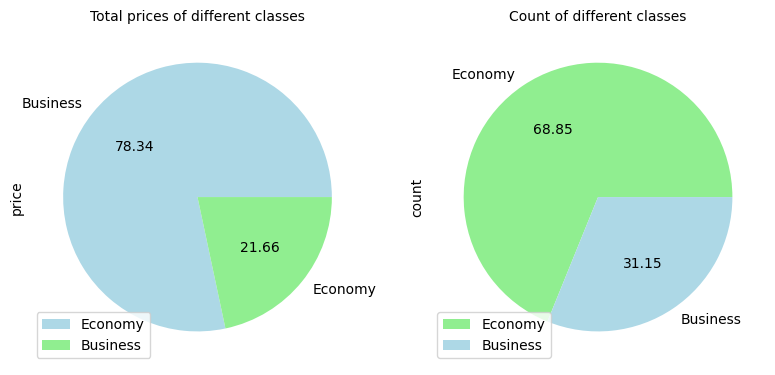

In [88]:
plt.figure(figsize=(8,5))

# Define colors for each class
colors = {'Business': 'lightblue', 'Economy': 'lightgreen'}  # You can choose any colors you prefer

# First subplot - Total prices
plt.subplot(1,2,1)
price_sum = df.groupby('class')['price'].sum()
price_sum.plot(kind='pie', textprops={'color':'black'}, autopct='%.2f',
               colors=[colors[cls] for cls in price_sum.index])
plt.title('Total prices of different classes', fontsize=10)
plt.legend(['Economy','Business'], loc='lower left')


plt.subplot(1,2,2)
class_counts = df['class'].value_counts()
class_counts.plot(kind='pie', textprops={'color':'black'}, autopct='%.2f',
                 colors=[colors[cls] for cls in class_counts.index])
plt.title('Count of different classes', fontsize=10)
plt.legend(['Economy','Business'], loc='lower left')

plt.subplots_adjust(wspace=0.9)
plt.tight_layout()
plt.show()

This box plot visualizes the distribution of flight prices for Economy and Business classes.
* As expected, Business class prices are substantially higher than Economy class prices.
* The median price for Business class is much higher, and the spread of prices is also wider compared to Economy class.
* Both classes show outliers with higher prices, but the range of outliers is much larger for Business class.

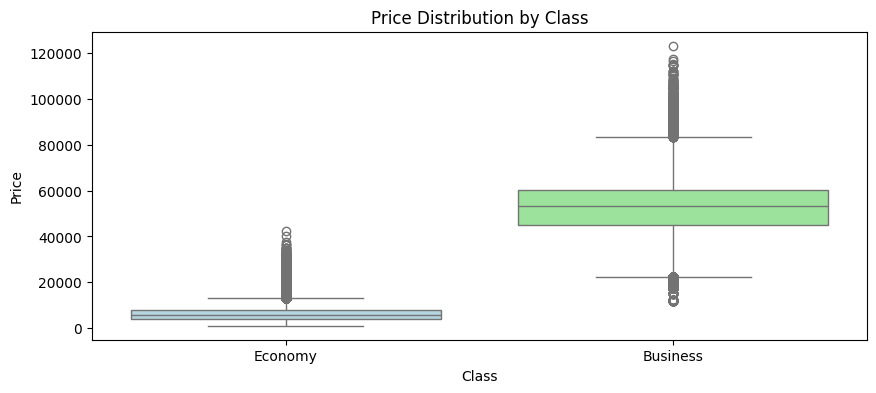

In [42]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['class'], y=df['price'], palette=['lightblue','lightgreen'])
plt.xlabel('Class')
plt.ylabel('Price')
plt.title('Price Distribution by Class')
plt.show()

This box plot displays the price distribution across different airlines.
* Vistara and Air India have significantly higher price ranges, which is likely due to them offering Business class flights.
* The other airlines (SpiceJet, AirAsia, GO FIRST, and Indigo) have a much lower price range, consistent with offering only Economy class.

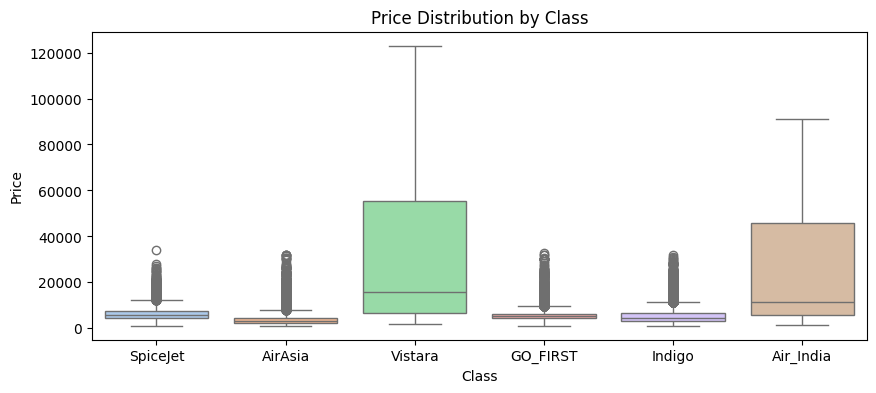

In [48]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['airline'], y=df['price'], palette="pastel")
plt.xlabel('Class')
plt.ylabel('Price')
plt.title('Price Distribution by Class')
plt.show()

This box plot specifically shows the price distribution of Economy class tickets across different airlines.
* Vistara and Air India still show slightly higher median prices and a wider spread compared to the other airlines even within the Economy class.
* SpiceJet, AirAsia, GO FIRST, and Indigo have relatively similar price distributions for Economy class.

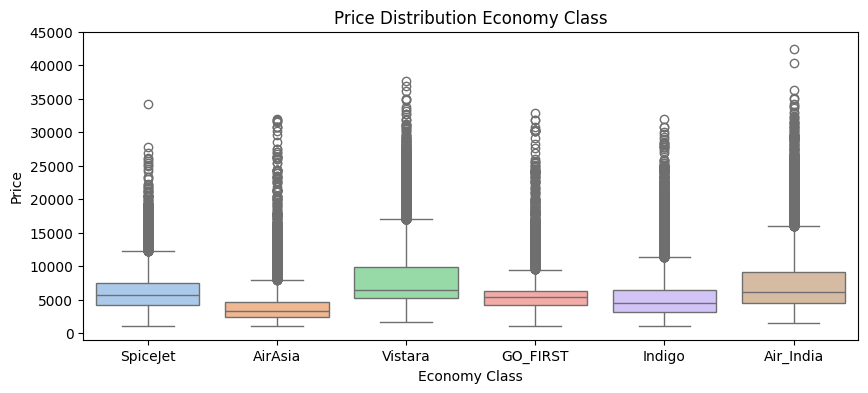

In [57]:
economy = df[df['class']=='Economy'][['airline','price']]

plt.figure(figsize=(10,4))
sns.boxplot(x=economy['airline'], y=economy['price'], palette="pastel")
plt.xlabel('Economy Class')
plt.ylabel('Price')
plt.title('Price Distribution Economy Class')
y_ticks = np.arange(0, 45001, 5000)
plt.yticks(y_ticks)
plt.show()

This bar plot illustrates the relationship between the number of stops and the average flight price.
* Flights with one stop have the highest average price.
* Flights with two or more stops have a higher average price than non-stop flights (zero stops), but lower than flights with one stop.
* Non-stop flights have the lowest average price.

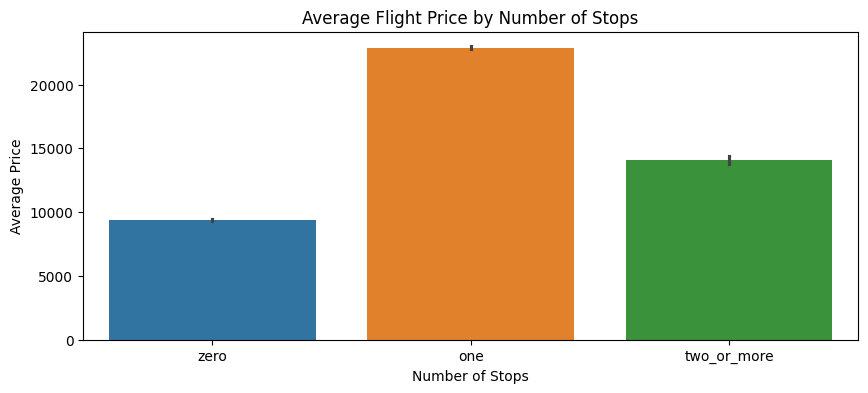

In [68]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x='stops', y='price', estimator='mean',hue='stops')
plt.xlabel('Number of Stops')
plt.ylabel('Average Price')
plt.title('Average Flight Price by Number of Stops')
plt.show()

These box plots show how ticket prices vary with departure and arrival times.
* For departure time, flights departing at Night tend to have higher prices, while Late_Night departures have the lowest prices. Early_Morning, Morning, and Evening departures have relatively similar price distributions.
* For arrival time, flights arriving in the Evening tend to have higher prices. Late_Night arrivals, similar to late night departures, have the lowest prices. Morning and Night arrivals have somewhat similar price distributions.

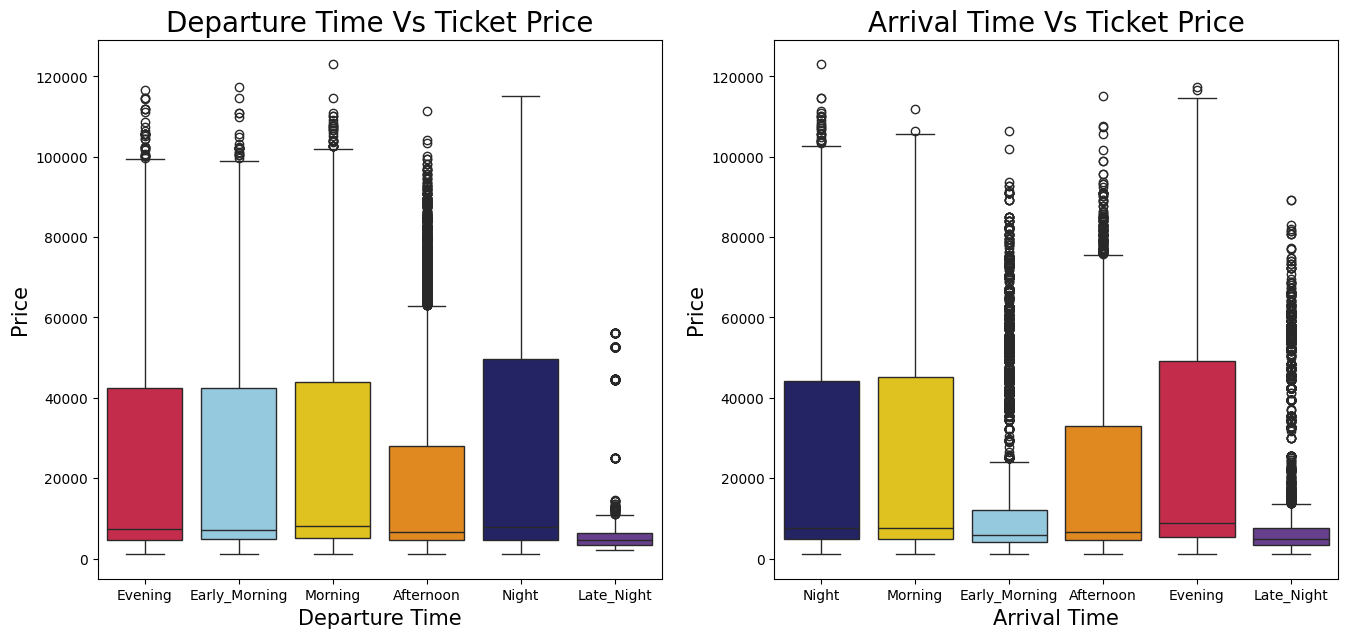

In [120]:
colors = {
    'Morning': 'gold',
    'Afternoon': 'darkorange',
    'Evening': 'crimson',
    'Night': 'midnightblue',
    'Late_Night': 'rebeccapurple',
    'Early_Morning': 'skyblue'
}


plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df,palette=colors)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)


plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette=colors)
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

These scatter plots visualize the relationship between flight duration and price for Economy and Business classes.
* For Economy class, there is a general trend that longer durations might be associated with slightly higher prices, but the relationship is not very strong and there is a wide spread of prices for any given duration.
* For Business class, there appears to be a weak positive correlation between duration and price, but again, the spread is significant. Business class prices are consistently much higher than Economy class prices across all durations.

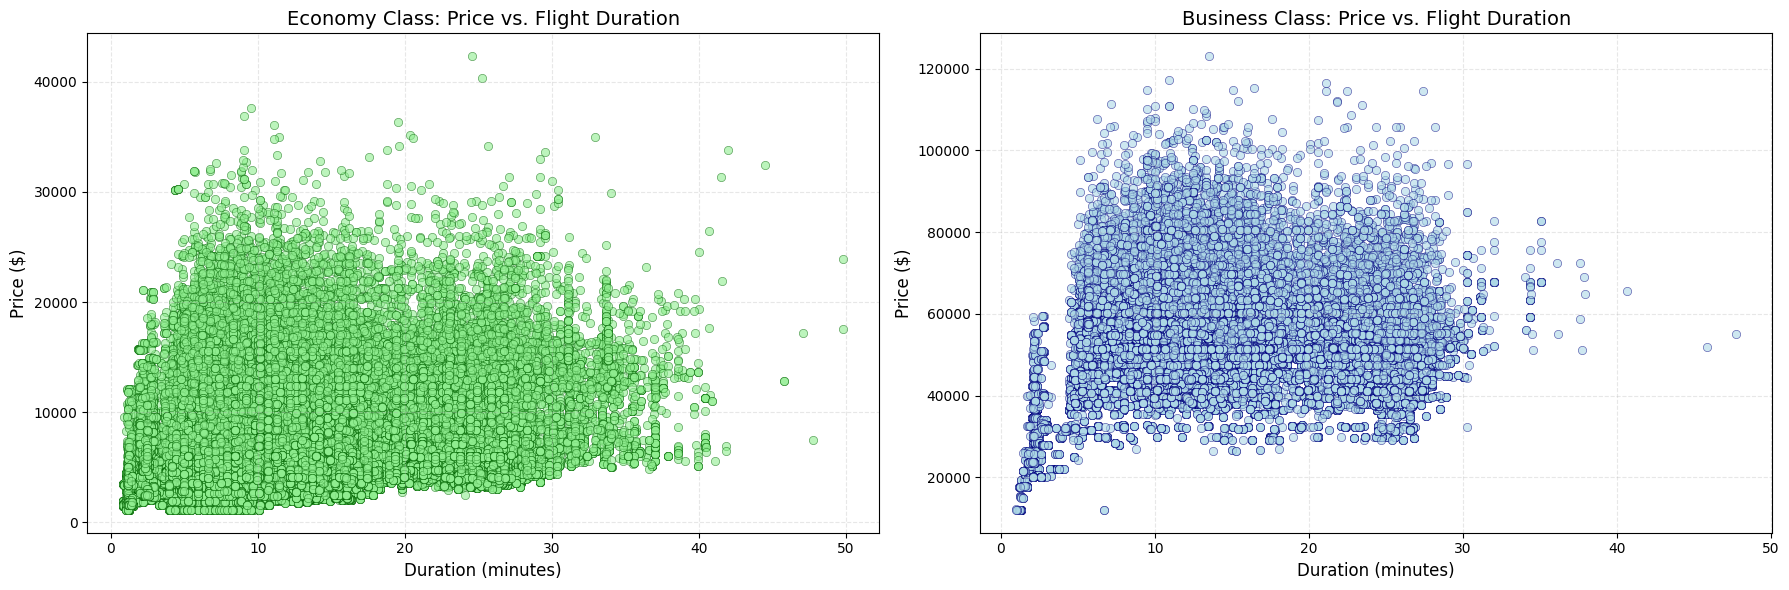

In [86]:

economy = df[df['class'] == 'Economy']
business = df[df['class'] == 'Business']


plt.figure(figsize=(18, 6))


plt.subplot(1, 2, 1)
sns.scatterplot(
    x='duration',
    y='price',
    data=economy,
    color='lightgreen',
    alpha=0.6,
    edgecolor='darkgreen'
)
plt.title('Economy Class: Price vs. Flight Duration', fontsize=14)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)


plt.subplot(1, 2, 2)
sns.scatterplot(
    x='duration',
    y='price',
    data=business,
    color='lightblue',
    alpha=0.6,
    edgecolor='navy'
)
plt.title('Business Class: Price vs. Flight Duration', fontsize=14)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


This line plot shows how the average flight price changes as the number of days left until departure decreases.
* The average price is generally higher when there are fewer days left until departure, especially for the last few days (e.g., 1 to 10 days).
* As the number of days left increases, the average price tends to decrease and then stabilize.

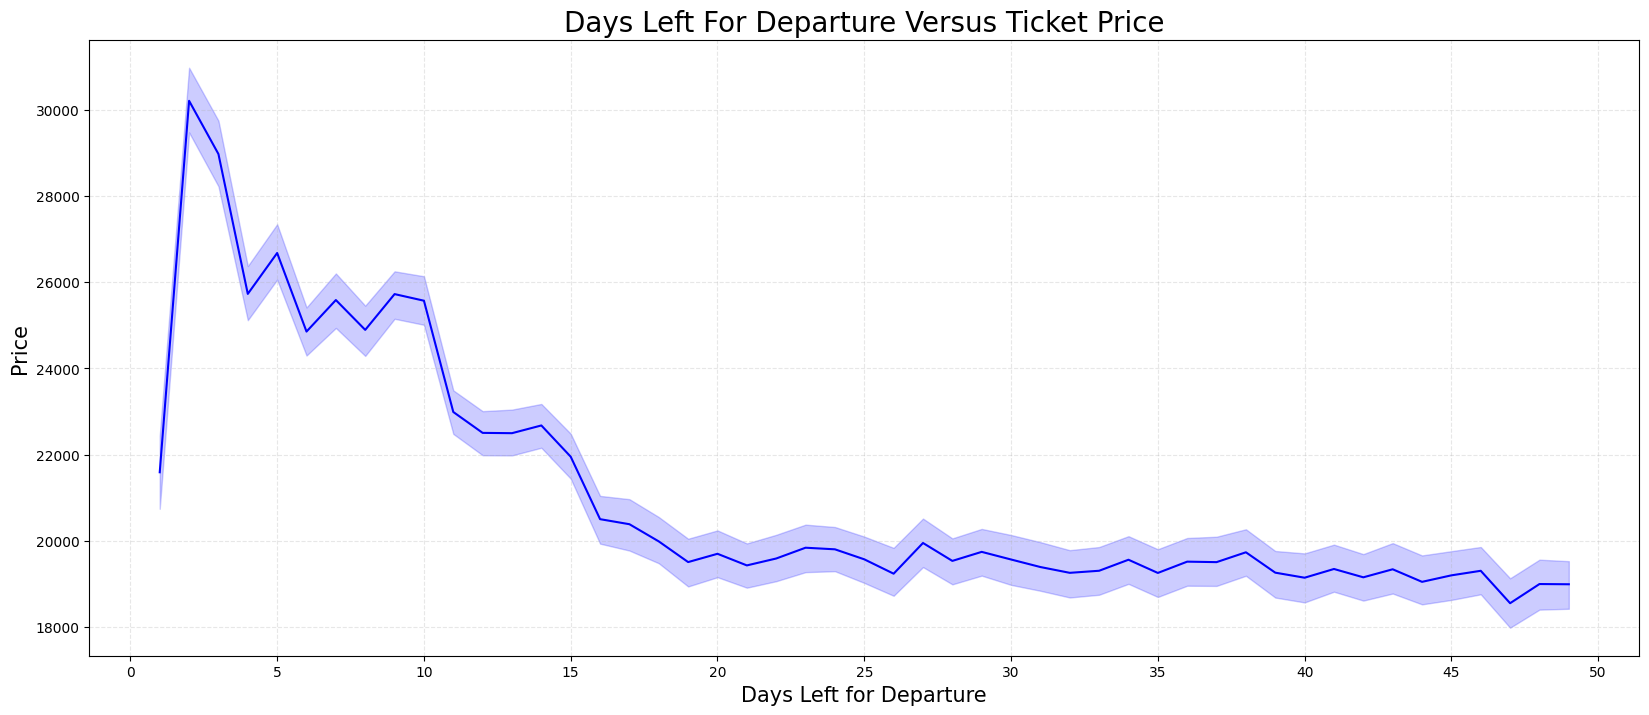

In [96]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=df, x='days_left', y='price', color='blue')
plt.title('Days Left For Departure Versus Ticket Price', fontsize=20)
plt.xlabel('Days Left for Departure', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(range(0, 51, 5))
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

This bar plot displays the average flight prices for different city pairs (routes).
* The routes with the highest average prices are Chennai to Bangalore and Kolkata to Chennai.
* The routes with the lowest average prices are Hyderabad to Delhi and Delhi to Hyderabad.
* There is considerable variation in average prices across different routes.

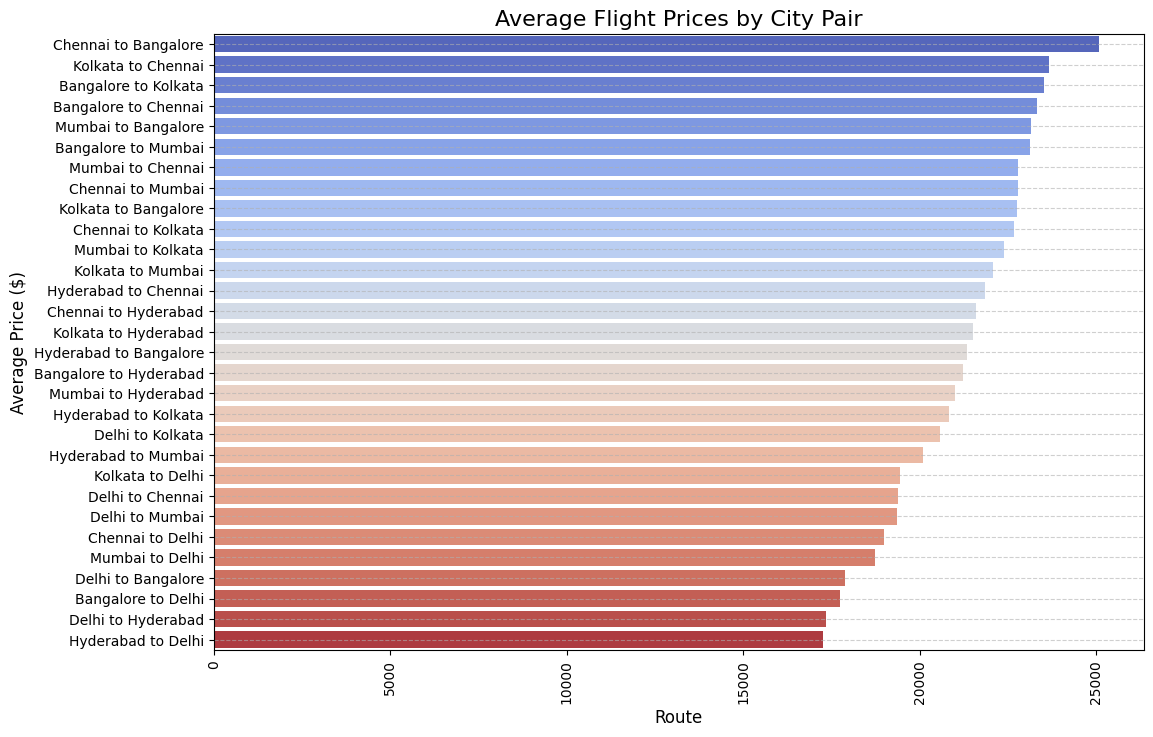

In [105]:
city_pairs  = df.groupby(['source_city','destination_city'],as_index=False)['price'].mean().sort_values(by='price',ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='price',
    y= city_pairs['source_city'] + ' to ' + city_pairs['destination_city'],
    data=city_pairs,
    palette='coolwarm'
)
plt.title('Average Flight Prices by City Pair', fontsize=16)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xlabel('Route', fontsize=12)
plt.xticks(rotation=90)  # Rotate city names vertically
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## Summary:

### EDA Key Findings

*   Vistara is the most frequent airline, with Morning, Early_Morning, and Evening being the most common departure times. Late\_Night departures are the least frequent.
*   Business class, offered only by Air India and Vistara, is significantly more expensive than Economy class, contributing a larger share to the total price despite fewer flights.
*   Flights with one stop have the highest average price, followed by flights with two or more stops. Non-stop flights have the lowest average prices.
*   Flights departing at Night and arriving in the Evening tend to have higher prices, while Late\_Night departures and arrivals have the lowest prices.
*   Booking flights closer to the departure date, particularly within the last few days, generally results in higher average prices. Prices tend to decrease and stabilize for bookings made further in advance.
*   Average flight prices vary significantly by route, with Chennai to Bangalore and Kolkata to Chennai having the highest average prices, and Hyderabad to Delhi and Delhi to Hyderabad having the lowest.

# The next step is to build a predictive model from this dataset


In [151]:
df_new = df.copy()
# removing the flight filed.
df_new.drop(columns=['flight'],inplace=True)
# ['Early_Morning','Morning','Afternoon','Evening','Night','Late_Night']
# ['zero', 'one', 'two_or_more']
# ['Economy', 'Business']
df_new.head(2)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [145]:
from sklearn.preprocessing import OneHotEncoder ,OrdinalEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# first we will split the data in to train and test and then we will do the feature engineering

X_train,X_test,y_train,y_test = train_test_split(df_new.drop(columns=['price']),df_new['price'],test_size=0.2,random_state=42)

transformer = ColumnTransformer(transformers=[
    ('tnf1',OrdinalEncoder(categories=[['Early_Morning','Morning','Afternoon','Evening','Night','Late_Night']]),['departure_time']),
    ('tnf2',OrdinalEncoder(categories=[['zero', 'one', 'two_or_more']]),['stops']),
    ('tnf3',OrdinalEncoder(categories=[['Economy', 'Business']]),['class']),
    ('tnf4',OrdinalEncoder(categories=[['Early_Morning','Morning','Afternoon','Evening','Night','Late_Night']]),['arrival_time']),
    ('tnf5',OneHotEncoder(sparse_output=False,drop='first'),['airline','source_city','destination_city']),
    ('tnf6',MinMaxScaler(),['days_left','duration'])
],remainder='passthrough')



In [152]:
X_train.head(2)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
148417,Air_India,Kolkata,Afternoon,one,Morning,Chennai,Economy,19.42,6
36879,Indigo,Delhi,Afternoon,two_or_more,Night,Chennai,Economy,7.00,13


In [155]:
x_train = transformer.fit_transform(X_train)
x_test = transformer.transform(X_test)

x_train.shape,x_test.shape

((240122, 21), (60031, 21))

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score ,mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

# Initialize models
lr = LinearRegression()
dt = DecisionTreeRegressor()

# Train and predict
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)
y_pred_dt = dt.predict(x_test)


print("\n=== Linear Regression ===")
print(f"Test R²: {r2_score(y_test, y_pred_lr):.4f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")
print(f"CV R² (10-fold): {np.mean(cross_val_score(lr, x_train, y_train, cv=10, scoring='r2')):.4f}")

print("\n=== Decision Tree ===")
print(f"Test R²: {r2_score(y_test, y_pred_dt):.4f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred_dt):.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred_dt)):.2f}")
print(f"CV R² (10-fold): {np.mean(cross_val_score(dt, x_train, y_train, cv=10, scoring='r2')):.4f}")


=== Linear Regression ===
Test R²: 0.9096
MAE: $4499.18
RMSE: $6826.22
CV R² (10-fold): 0.9097

=== Decision Tree ===
Test R²: 0.9760
MAE: $1172.51
RMSE: $3518.50
CV R² (10-fold): 0.9763
